# Breast Cancer Diagnosis

In [ ]:
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()

## Part 1: Getting started
First off, take a look at the `data`, `target` and `feature_names` entries in the `dataset` dictionary. They contain the information we'll be working with here. Then, create a Pandas DataFrame called `df` containing the data and the targets, with the feature names as column headings. If you need help, see [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) for more details on how to achieve this. 
* How many features do we have in this dataset?   30
* What are the target classes?   [0 1]
* What do these target classes signify?  ['malignant' 'benign']
* How many participants tested `Malignant`?   212
* How many participants tested `Benign`?   357


In [ ]:
import numpy as np
import pandas as pd
print ("dataset features: ", dataset.data.shape[1])
print ("target classes: ", np.unique(dataset.target))
print ("target classes signify: ", dataset.target_names)
print ("participants tested Malignant: ", np.sum(dataset.target == 0))
print ("participants tested Benign: ", np.sum(dataset.target == 1))

# create dataframe df 
df = pd.DataFrame(data= dataset.data, columns= dataset.feature_names)
# add column 'targets' 
df['targets']=dataset.target.reshape(-1,1)

# add column 'targets_type'
df['targets_type']= pd.Series(['malignant' if item==0 else 'benign' for item in dataset.target])
df.head()

dataset features:  30
target classes:  [0 1]
target classes signify:  ['malignant' 'benign']
participants tested Malignant:  212
participants tested Benign:  357


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,targets,targets_type
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,malignant


Use `seaborn.lmplot` ([help here](https://seaborn.pydata.org/generated/seaborn.lmplot.html)) to visualize a few features of the dataset. Draw a plot where the x-axis is "mean radius", the y-axis is "mean texture," and the color of each datapoint indicates its class. Do this once again for different features for the x- and y-axis and see how the data is distributed. **[1]**

Standardizing the data is often critical in machine learning. Show a plot as above, but with two features with very different scales. Standardize the data and plot those features again. What's different? Why? **[1]**

It is best practice to have a training set (from which there is a rotating validation subset) and a test set. Our aim here is to (eventually) obtain the best accuracy we can on the test set (we'll do all our tuning on the training/validation sets, however). To tune `k` (our hyperparameter), we employ cross-validation ([Help](https://scikit-learn.org/stable/modules/cross_validation.html)). Cross-validation automatically selects validation subsets from the data that you provided. Split the dataset into a train and a test set **"70:30"**, use **``random_state=0``**. The test set is set aside (untouched) for final evaluation, once hyperparameter optimization is complete. **[1]**

**

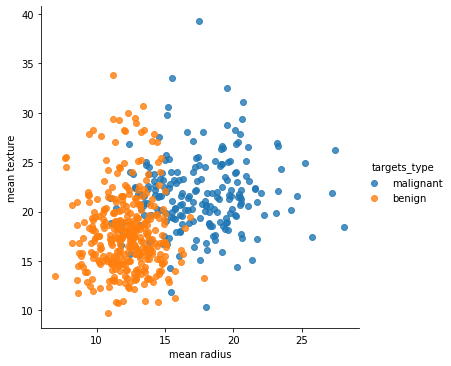

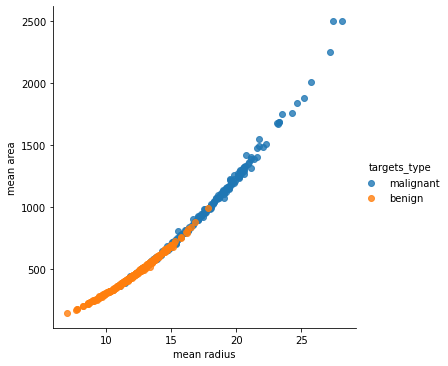

In [ ]:
import seaborn as sns
# 'mean radius' vs 'mean texture'
sns.lmplot (x='mean radius', y='mean texture', data=df, hue= 'targets_type', fit_reg= False)
# 'radius error' vs 'texture error'
sns.lmplot (x='mean radius', y='mean area', data=df, hue= 'targets_type', fit_reg= False)

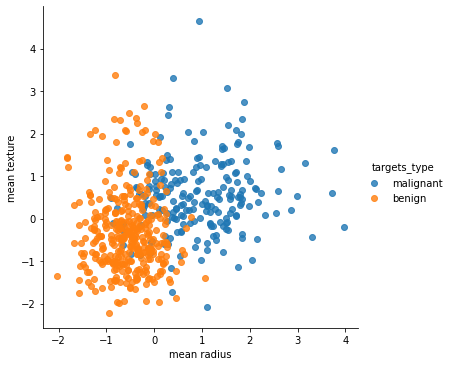

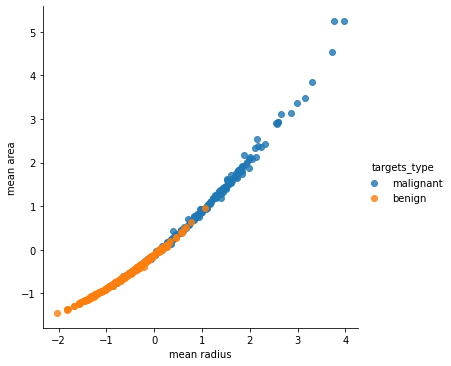

In [ ]:
# Standardize the features
stand_features= (df.iloc[:,0:30] - df.iloc[:,0:30].mean()) / df.iloc[:,0:30].std()
df_stand = pd.DataFrame.copy(df)
df_stand.iloc[:,0:30] = stand_features
df_stand.head(5)

# Plot features
sns.lmplot (x='mean radius', y='mean texture', data=df_stand, hue= 'targets_type', fit_reg= False)
sns.lmplot (x='mean radius', y='mean area', data=df_stand, hue= 'targets_type', fit_reg= False)

# After standardization, features have mean zero and standard deviation 1, the scale range of features became smaller.
#       However, the points patter of scatter plots are the same.

In [ ]:
from sklearn.model_selection import train_test_split
# Without standardization
x_train, x_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.3, random_state=0)
# With standardization
x_train_stand, x_test_stand, y_train_stand, y_test_stand = train_test_split(np.array(df_stand.iloc[:,0:30]), 
                                                        np.array(df_stand.iloc[:,30]) , test_size=0.3, random_state=0)

## Part 2: KNN Classifier without Standardization 
Normally, standardizing data is a key step in preparing data for a KNN classifier. However, for educational purposes, let's first try to build a model without standardization. Let's create a KNN classifier to predict whether a patient has a malignant or benign tumor. 

Follow these steps: 

1.   Train a KNN Classifier using cross-validation on the dataset. Sweep `k` (number of neighbours) from 1 to 100, and show a plot of the mean cross-validation accuracy vs `k`.  
2.   What is the best `k`? Comment on  which `k`s lead to underfitted or overfitted models.  
3.   Can you get the same accuracy (roughly) with fewer features using a KNN model? You're free to use trial-and-error to remove features (try at least 5 combinations), or use a more sophisticated approach like [Backward Elimination](https://towardsdatascience.com/backward-elimination-for-feature-selection-in-machine-learning-c6a3a8f8cef4). 
Describe your findings using a graph or table (or multiple!).  



### 2.1 plot of the mean cross-validation accuracy vs k

Text(0.5, 1.0, 'Training data (without Standardization)')

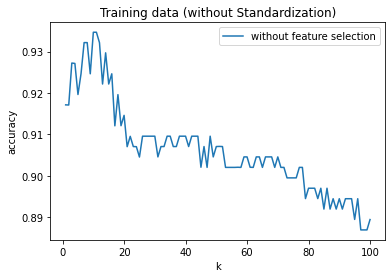

In [ ]:
from sklearn import neighbors
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# knn = neighbors.KNeighborsClassifier (n_neighbors=1)
# scores = cross_val_score(knn, x_train, y_train, cv=5)
# scores.mean()

x = [k for k in range(1,101)]
y1 = [cross_val_score(neighbors.KNeighborsClassifier (n_neighbors=k), 
                x_train, y_train, cv=5).mean()  for k in range(1,101)]

plt.plot(x,y1,label="without feature selection")  
plt.legend()
plt.xlabel("k")
plt.ylabel("accuracy")
plt.title ("Training data (without Standardization)") 

### 2.2 find best k

In [ ]:
print ('best k=', x[y1.index(max(y1))], ', with highest accuracy')
 
# The accuracy drops when k deacrese from it's best value, which leads to overfitted models,
# The accuracy drops when k increase from it's best value, which leads to underfitted models.

best k= 10 , with highest accuracy


### 2.3 feture reduction (backward elimination)

In [ ]:
# helper function 'Find_largest_pval': 
#                  find t-stat and p-val of coefficients

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

def Find_largest_pval (x,y):
  lm = LinearRegression()
  lm.fit(x,y)
  y_pridiction = lm.predict(x) 

  # beta = (x'x)^-1 x'y
  beta = np.append(lm.intercept_, lm.coef_) 

  # MSE = sum ((yi-yi^)^2)/ n-1-k
  n = x.shape[0]
  k = x.shape[1]
  MSE = (sum ((y-y_pridiction)**2) / (n-1-k))
  
  # var(beta) = (x'x)^-1 MSE
  new_x = pd.DataFrame(x) 
  new_x.insert(0,'c0',np.ones(n))
  var_beta = (np.linalg.inv(new_x.T @ new_x) * MSE).diagonal() 

  tstat = beta/np.sqrt(var_beta)
  pval =[2*(1-stats.t.cdf(np.abs(i),n-1-k)) for i in tstat] 

  # create dataframe 
  reg_result = pd.DataFrame ({"Coefficients":beta, "T statistcs":tstat, "P-value":pval}).round(decimals=4)
  
  return reg_result.sort_values(by='P-value',ascending=False)

# example show output of helper function:
Find_largest_pval (x_train,y_train).head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,Coefficients,T statistcs,P-value
5,-0.0200,-0.0081,0.9935
10,-0.1480,-0.0221,0.9823
4,-0.0001,-0.0972,0.9226
26,0.0930,0.2150,0.8299
16,-0.8347,-0.3163,0.7520


In [ ]:
# helper function'feature_reduction': 
#                 remove non-significant features by Backward Elimination

def feature_reduction (x_train, y_train, x_test):
  # removes the highest p-value greater than alpha
  alpha = 0.05

  while Find_largest_pval(x_train,y_train).iloc[0,2] > alpha:
    # index of row who's p-value is largest
    i = Find_largest_pval(x_train,y_train).index[0]
    x_train = np.delete(x_train,i, axis=1)
    x_test = np.delete(x_test,i, axis=1) 

  # output: non significant features have been removed 
  return x_train, x_test

Text(0.5, 1.0, 'Training data (without Standardization)')

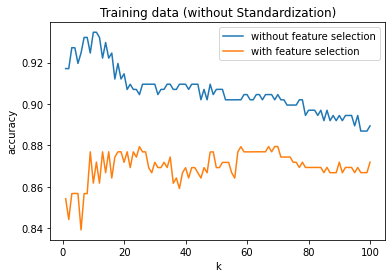

In [ ]:
# plot 
x_train_red = feature_reduction (x_train, y_train, x_test)[0]
 
x = [k for k in range(1,101)]
y2 = [cross_val_score(neighbors.KNeighborsClassifier (n_neighbors=k), 
                x_train_red, y_train, cv=5).mean()  for k in range(1,101)]

plt.plot(x,y1,label="without feature selection") 
plt.plot(x,y2,label="with feature selection")
plt.legend()
plt.xlabel("k")
plt.ylabel("accuracy")
plt.title ("Training data (without Standardization)") 

# When model complexity decrease, the training error increase. That point can be demonstrated from the 
#      following plot, the accuracy decrease after future selection.

## Part 3: Standardization 

Standardizing the data usually means scaling our data to have a mean of zero and a standard deviation of one. 

Note: When we standardize a dataset, do we care if the data points are in our training set or test set? Yes! The training set is available for us to train a model - we can use it however we want. The test set, however, represents a subset of data that is not available for us during training. For example, the test set can represent the data that someone who bought our model would use to see how the model performs (which they are not willing to share with us).
Therefore, we cannot compute the mean or standard deviation of the whole dataset to standardize it - we can only calculate the mean and standard deviation of the training set. However, when we sell a model to someone, we can say what our scalers (mean and standard deviation of our training set) was. They can scale their data (test set) with our training set's mean and standard deviation. Of course, there is no guarantee that the test set would have a mean of zero and a standard deviation of one, but it should work fine.

**To summarize: We fit the StandardScaler only on the training set. We transform both training and test sets with that scaler.**

1. Create a KNN classifier with standardized data ([Help](https://scikit-learn.org/stable/modules/preprocessing.html)), and reproduce all steps in Part 2.  

2. Does standardization lead to better model performance? Is performance better or worst? Discuss.  


### 3.1 repeat part2 with standardized data

without feature selection, best k= 12 , with highest accuracy
with feature selection, best k= 14 , with highest accuracy


Text(0.5, 1.0, 'Training data (with Standardization)')

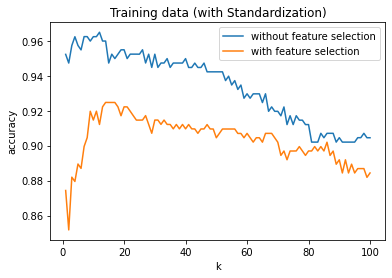

In [ ]:
x = [k for k in range(1,101)]
y3 = [cross_val_score(neighbors.KNeighborsClassifier (n_neighbors=k), 
                x_train_stand, y_train_stand, cv=5).mean()  for k in range(1,101)]

# feture reduction (backward elimination)
x_train_stand_red = feature_reduction (x_train_stand, y_train_stand, x_test_stand) [0]

y4 = [cross_val_score(neighbors.KNeighborsClassifier (n_neighbors=k), 
                x_train_stand_red, y_train_stand, cv=5).mean()  for k in range(1,101)]

print ('without feature selection, best k=', x[y3.index(max(y3))], ', with highest accuracy') 
print ('with feature selection, best k=', x[y4.index(max(y4))], ', with highest accuracy') 

# When model complexity decrease, the training error increase. That point can be demonstrated from the 
#      following plot, the accuracy decrease after future selection.

plt.plot(x,y3,label="without feature selection") 
plt.plot(x,y4,label="with feature selection")
plt.legend()
plt.xlabel("k")
plt.ylabel("accuracy")
plt.title ("Training data (with Standardization)") 

### 3.2 standardization lead to better model performance?

Text(0.5, 1.0, 'Training data (without future selction)')

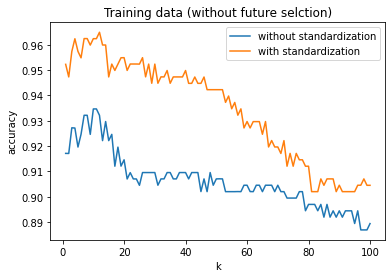

In [ ]:
plt.plot(x,y1,label="without standardization") 
plt.plot(x,y3,label="with standardization")
plt.legend()
plt.xlabel("k")
plt.ylabel("accuracy")
plt.title ("Training data (without future selction)") 

Text(0.5, 1.0, 'Training data (with future selction)')

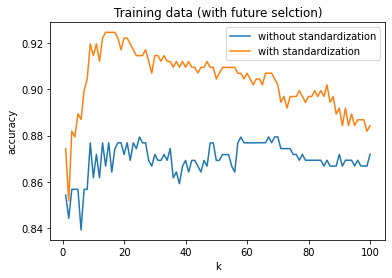

In [ ]:
plt.plot(x,y2,label="without standardization") 
plt.plot(x,y4,label="with standardization")
plt.legend()
plt.xlabel("k")
plt.ylabel("accuracy")
plt.title ("Training data (with future selction)") 

# Standardization have improve the accuracy for data before and after future selection. 

## Part 4: Test Data 

Now that you've created several models, pick your best one (highest accuracy) and apply it to the test dataset you had initially set aside. Discuss.  

In [ ]:
# If only consider how models perform on traning data, the best model is the one with standardization  
#    and without future selection.  

from sklearn.metrics import accuracy_score
x_test_stand_red = feature_reduction(x_train_stand, y_train_stand, x_test_stand) [1]

# model without future selction
knn1 = neighbors.KNeighborsClassifier (n_neighbors=12)  
knn1.fit(x_train_stand, y_train_stand)
print ("accuracy of model without future selction: ", accuracy_score(y_test_stand, knn1.predict(x_test_stand)))

# model with future selction
knn2 = neighbors.KNeighborsClassifier (n_neighbors=14)  
knn2.fit(x_train_stand_red, y_train_stand)
print ("accuracy of model with future selction: ", accuracy_score(y_test_stand, knn2.predict(x_test_stand_red)))

accuracy of model without future selction:  0.9590643274853801
accuracy of model with future selction:  0.8888888888888888


Text(0.5, 1.0, 'Standardized training and testing data')

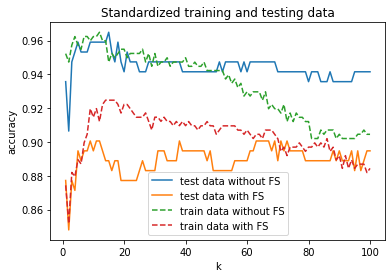

In [ ]:
# However, sometimes the model with low trainging error may have high testing error. we also have 
#          to consider how the model perform for the testing set.

y5, y6 = [], []

for k in range(1,101):
  knn = neighbors.KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train_stand, y_train_stand)
  y5.append(accuracy_score(y_test_stand, knn.predict(x_test_stand)))

  knn1 = neighbors.KNeighborsClassifier(n_neighbors=k)
  knn1.fit(x_train_stand_red, y_train_stand)
  y6.append(accuracy_score(y_test_stand, knn1.predict(x_test_stand_red)))
 
# FS means feature selection
plt.plot(x,y5,label="test data without FS")  
plt.plot(x,y6,label="test data with FS")  
plt.plot(x,y3,'--',label="train data without FS") 
plt.plot(x,y4,'--',label="train data with FS")

plt.legend()
plt.xlabel("k")
plt.ylabel("accuracy")
plt.title ("Standardized training and testing data") 

In [ ]:
# After considering the performance on testing data, the best model is still the one with standardization and 
#       without future selection. The model with future selection may be too simple (underfitting)

## Part 5: New Dataset 
Find an appropriate classification dataset online and train a KNN model to make predictions.

*   Introduce your dataset.  
*   Create a KNN classifier using the tools you've learned.  
*   Present your results.  

Hint: you can find various datasets here: https://www.kaggle.com/datasets and here: https://scikit-learn.org/stable/datasets/index.html#toy-datasets.

To use a dataset in Colab, you can upload it in your Google drive and access it in Colab ([help here](https://medium.com/analytics-vidhya/how-to-fetch-kaggle-datasets-into-google-colab-ea682569851a)), or you can download the dataset on your local machine and upload it directly to Colab using the following script.

```
from google.colab import files
uploaded = files.upload()
```

When submitting your project on Quercus, please make sure you are also uploading your dataset so we can fully run your notebook.

In [ ]:
from sklearn.datasets import load_wine
wineset = load_wine() 

### 5.1 Introduce your dataset
* How many features do we have in this dataset?   13
* What are the target classes?   [0 1 2]
* What do these target classes signify?  ['class_0'  'class_1'  'class_2']
* How many wine tested `class_0`?   59
* How many wine tested `class_1`?   71
* How many wine tested `class_2`?   48

In [ ]:
print ("dataset features: ", wineset.data.shape[1])
print ("dataset features: ", wineset.data.shape[0])
print ("target classes: ", np.unique(wineset.target))
print ("target classes signify: ", wineset.target_names)
print ("participants tested 'class_0': ", np.sum(wineset.target == 0))
print ("participants tested 'class_1': ", np.sum(wineset.target == 1))
print ("participants tested 'class_2': ", np.sum(wineset.target == 2))

# create dataframe wine
wine = pd.DataFrame(data= wineset.data, columns= wineset.feature_names)
# add column 'targets' 
wine['targets']=wineset.target.reshape(-1,1)

# add column 'targets_type'
wine['targets_type']= pd.Series(['class_0' if item==0  
                                  else 'class_1' if  item==1 
                                  else 'class_2' for item in wineset.target])
wine.head()

dataset features:  13
dataset features:  178
target classes:  [0 1 2]
target classes signify:  ['class_0' 'class_1' 'class_2']
participants tested 'class_0':  59
participants tested 'class_1':  71
participants tested 'class_2':  48


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,targets,targets_type
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,class_0


### 5.2 Create a KNN classifier using the tools you've learned.

In [ ]:
# Standardize the features
wine_stand_features= (wine.iloc[:,0:13] - wine.iloc[:,0:13].mean()) / wine.iloc[:,0:13].std()
wine_stand = pd.DataFrame.copy(wine)
wine_stand.iloc[:,0:13] = wine_stand_features
wine_stand.head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,targets,targets_type
0,1.514341,-0.560668,0.231400,-1.166303,1.908522,0.806722,1.031908,-0.657708,1.221438,0.251009,0.361158,1.842721,1.010159,0,class_0
1,0.245597,-0.498009,-0.825667,-2.483841,0.018094,0.567048,0.731565,-0.818411,-0.543189,-0.292496,0.404908,1.110317,0.962526,0,class_0
2,0.196325,0.021172,1.106214,-0.267982,0.088110,0.806722,1.212114,-0.497005,2.129959,0.268263,0.317409,0.786369,1.391224,0,class_0
3,1.686791,-0.345835,0.486554,-0.806975,0.928300,2.484437,1.462399,-0.979113,1.029251,1.182732,-0.426341,1.180741,2.328007,0,class_0
4,0.294868,0.227053,1.835226,0.450674,1.278379,0.806722,0.661485,0.226158,0.400275,-0.318377,0.361158,0.448336,-0.037767,0,class_0


In [ ]:
# Split the dataset into a train and a test set "70:30"  
x_train_winestand, x_test_winestand, y_train_winestand, y_test_winestand = train_test_split(np.array(wine_stand.iloc[:,0:13]), 
                                                                                            np.array(wine_stand.iloc[:,13]) , test_size=0.3, random_state=0)

In [ ]:
# wine train set have sample 99, sweep k from 1 to 100
x = [k for k in range(1,100)]
y11 = [cross_val_score(neighbors.KNeighborsClassifier (n_neighbors=k), 
                x_train_winestand, y_train_winestand, cv=5).mean()  for k in range(1,100)]

# feture reduction (backward elimination)
x_train_winestand_red = feature_reduction (x_train_winestand, y_train_winestand, x_test_winestand) [0]

y12 = [cross_val_score(neighbors.KNeighborsClassifier (n_neighbors=k), 
                x_train_winestand_red, y_train_winestand, cv=5).mean()  for k in range(1,100)]

without feature selection, best k= 19 , with highest accuracy
with feature selection, best k= 5 , with highest accuracy


Text(0.5, 1.0, 'Training data (with Standardization)')

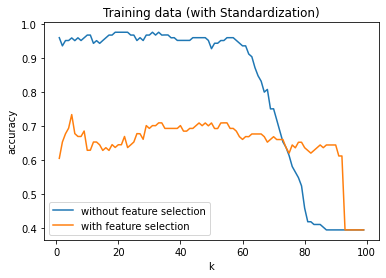

In [ ]:
# show a plot of the mean cross-validation accuracy vs k 
print ('without feature selection, best k=', x[y11.index(max(y11))], ', with highest accuracy') 
print ('with feature selection, best k=', x[y12.index(max(y12))], ', with highest accuracy') 
 
plt.plot(x,y11,label="without feature selection") 
plt.plot(x,y12,label="with feature selection")
plt.legend()
plt.xlabel("k")
plt.ylabel("accuracy")
plt.title ("Training data (with Standardization)") 

### 5.3 Present your results

In [ ]:
# If only consider how models perform on traning data, the best model is the one without future selection. 

x_test_winestand_red = feature_reduction(x_train_winestand, y_train_winestand, x_test_winestand) [1]
 
# model without future selction
knn1 = neighbors.KNeighborsClassifier (n_neighbors=19)  
knn1.fit(x_train_winestand, y_train_winestand)
print ("accuracy of model without future selction: ", accuracy_score(y_test_winestand, knn1.predict(x_test_winestand)))

# model with future selction
knn2 = neighbors.KNeighborsClassifier (n_neighbors=5)  
knn2.fit(x_train_winestand_red, y_train_winestand)
print ("accuracy of model with future selction: ", accuracy_score(y_test_winestand, knn2.predict(x_test_winestand_red)))


accuracy of model without future selction:  1.0
accuracy of model with future selction:  0.6666666666666666


Text(0.5, 1.0, 'Standardized training and testing data')

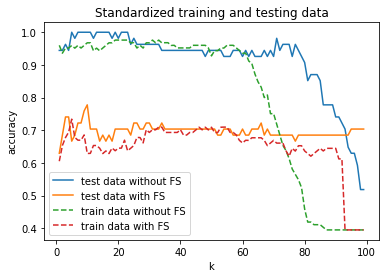

In [ ]:
# However, sometimes the model with low trainging error may have high testing error. 
#          Next, consider how the model perform for the testing set.

y13, y14 = [], []
 
for k in range(1,100):
  knn = neighbors.KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train_winestand, y_train_winestand)
  y13.append(accuracy_score(y_test_winestand, knn.predict(x_test_winestand)))

  knn1 = neighbors.KNeighborsClassifier(n_neighbors=k)
  knn1.fit(x_train_winestand_red, y_train_winestand)
  y14.append(accuracy_score(y_test_winestand, knn1.predict(x_test_winestand_red)))
 
# FS: feature selection
plt.plot(x,y13,label="test data without FS")  
plt.plot(x,y14,label="test data with FS")  
plt.plot(x,y11,'--',label="train data without FS") 
plt.plot(x,y12,'--',label="train data with FS")

plt.legend()
plt.xlabel("k")
plt.ylabel("accuracy")
plt.title ("Standardized training and testing data") 

In [ ]:
# After considering the performance on testing data, the best model is still the one with standardization and 
#       without future selection. The model with future selection may be too simple (underfitting).